## Member
20127247 - Phan Xuân Nam 

20127560 - Phạm Trần Trung Lượng

# 1. Collecting data

The subject of our data is about **"Reviews about books and comments about the books"**. Our source of data is based on Kaggle, which is the current accessible site for us. 

The reason why we choose this dataset is because we believe that the current generation is less and less interested in books. According to Đào Thị Thanh Hòa, the author of this [report](https://repository.vnu.edu.vn/bitstream/VNU_123/72213/1/HoiThaoVanHoaTrongKyNguyenSo%203.pdf), the 4th industrial revolution is directly making the habit of reading books on the verge of challenges. And many researchers indicate that the average Vietnamese spend less than 1 hour per week to read books, which is detrimental to the cultural aspects. That is the reason why we believe that by conducting the EDA and questions, we might understand the importance of books through reviews and ratings from readers, so that we can recommend and spread the reading habit to other people.

The author of this dataset has given us (or everyone) the rights to use and modify it. This means that the author has the license **CC0: Public Domain** which allows everyone to has the same rights as the author does. As long as we use the dataset within our course, we ensure that we will not use the dataset for illegal actions or inappropriate activities which can cause problems for us.

According to the author, the dataset is collected by scraping from the website [Tiki](https://tiki.vn/). Accourding to us, the author seems to use **HTML Parsing** to crawl the data from the website. This is why the total amount of data is quite small, just more than 1500 for books. On the other hand, the comments one are quite large, more than 150.000 lines to work on. We don't think that the author will use API since it's usually impossible to have access to a big company's API and it's also not an open source website so pretty much everything is done by hand.

# 2. Exploring data (often interleaved with preprocessing)

Import important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

Read all .csv files and perform exploration.

We decide that we wouldn't use the book_id.csv file since it is redundant

First, we will read data file "book_data.csv" and save to DataFrame `book_df`. 

In [2]:
book_df = pd.read_csv('data/book_data.csv')
book_df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


Second, we will read data file "comment_data.csv" and save to DataFrame `comment_df`. 

In [3]:
comment_df = pd.read_csv('data/comments.csv')
comment_df.head()

,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


### 2.1 How many rows and how many columns?

We get the number of rows and columns of the DataFrame `book_df` and store it in `num_rows` and `num_cols` variables.

In [4]:
num_rows = book_df.shape[0]
num_cols = book_df.shape[1]
print(f'Number of rows: ',num_rows)
print(f'Number of cols: ',num_cols)

Number of rows:  1796
Number of cols:  12


We get the number of rows and columns of the DataFrame `comment_df` and store it in `num_rows` and `num_cols` variables.

In [5]:
num_rows = comment_df.shape[0]
num_cols = comment_df.shape[1]
print(f'Number of rows: ',num_rows)
print(f'Number of cols: ',num_cols)

Number of rows:  141281
Number of cols:  7


### 2.2 What is the meaning of each column?

Meaning of each column in `book_df` describle below

| Column      | Description |
| :---        |    :----   |    
| `product_id`      | Id of the product in the Tiki database (unique)      | 
| `title`   |  Name of the book, maybe contain republish time       | 
| `authors`    |    same with it's name              |
| `original_price`    |      price at the first time             |
| `current_price`    |  price at present if having a discount                 |
| `quantity`    |  	total number of books sold of all time                 |
| `category`    |  	kind of book                 |
| `n_review`    |   number of reviews               |
| `avg_rating`    |  average rating (max 5.0)                 |
| `pages`    |     total pages of each book              |


Meaning of each column in `comment_df` describle below

| Column      | Description |
| :---        |    :----   |    
| `product_id`      | same with book_data file      | 
| `title`   |  keywork of comment       | 
| `comment_id`    |   each comment has individual id        |
| `thank_count`    |     number of like of other people            |
| `customer_id`    |  price at present if having a discount                 |
| `rating`    |  average rating of the comment             |
| `category`    |  	kind of book                 |
| `content`    |  same with it's name             |


### 2.3 Are there duplicated rows?

In [6]:
num_duplicated_rows = book_df[book_df.duplicated(keep=False)].shape[0]
num_duplicated_rows

35

In `book_df` there are 35 duplicated rows. So we will remove it

In [7]:
book_df = book_df.drop_duplicates()
num_rows = book_df.shape[0]
num_rows

1777

After remove duplicated rows, `book_df` has 1777 rows

In [8]:
num_duplicated_rows = comment_df[comment_df.duplicated(keep=False)].shape[0]
num_duplicated_rows

39299

In `comment_df` there are 39299 duplicated rows. So we will remove it

In [9]:
comment_df = comment_df.drop_duplicates()
num_rows = comment_df.shape[0]
num_rows

121393

After remove duplicated rows, `comment_df` has 121393 rows

### 2.4 What is the current data type of each column? Are there columns having inappropriate data types?

In [10]:
dtypes = pd.Series(dict(book_df.dtypes))
dtypes

product_id          int64
title              object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
cover_link         object
dtype: object

We can see some of data type of the column has appropriate type. Some of them in object type like `pages`,`manufacturer`, `category`, `title`, `authors`,... We will explore and convert pages into integer and the remain will be string

In [11]:
# book_df.astype({'pages': np.float32})
book_df['pages'] = pd.to_numeric(book_df['pages'] , errors='coerce')

In [12]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes
print('category',open_object_dtype(book_df.category) )
print('manufacturer',open_object_dtype(book_df.manufacturer) )
book_df.loc[book_df['category'].str.strip() == '','category'] = np.nan
book_df.loc[book_df['manufacturer'].str.strip() == '','manufacturer'] = np.nan

book_df = book_df.astype({'manufacturer': str,'category':str})

category {<class 'str'>}
manufacturer {<class 'str'>, <class 'float'>}


We will replace which rows has zero characters by `np.nan` and cast them into str

In [13]:
dtypes = pd.Series(dict(comment_df.dtypes))
dtypes

product_id      int64
comment_id      int64
title          object
thank_count     int64
customer_id     int64
rating          int64
content        object
dtype: object

With `comment_df` we also see some of data type of the column has appropriate type. Some of them in object type like `title`,`content`. We will explore and convert them into string

In [14]:
print('title',open_object_dtype(comment_df.title ) )
print('content',open_object_dtype(comment_df.content ) )
comment_df.loc[comment_df['title'].str.strip() == '','title'] = np.nan
comment_df.loc[comment_df['content'].str.strip() == '','content'] = np.nan
comment_df = comment_df.astype({'title': str,'content':str})

title {<class 'str'>, <class 'float'>}
content {<class 'str'>, <class 'float'>}


### With each numerical column, how are values distributed?


Numerical columns in `book_df` is `product_id`,	`original_price`,	`current_price`,	`quantity`,	`n_review`,	`avg_rating`,	`pages`.

In [15]:
cols = book_df.select_dtypes([np.number]).columns
min = book_df[cols].min()
missing_percentage = book_df[cols].isnull().sum()/num_rows*100
lower_quartile = book_df[cols].quantile(0.25)
median = book_df[cols].quantile(0.5)
upper_quartile = book_df[cols].quantile(0.75)
max = book_df[cols].max()
nume_col_info_df = pd.concat([missing_percentage,min,lower_quartile,median,upper_quartile,max],axis = 1).T
nume_col_info_df.index = [ "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"]
nume_col_info_df = nume_col_info_df.round(1)
nume_col_info_df

,product_id,original_price,current_price,quantity,n_review,avg_rating,pages
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.2
min,335337.0,0.0,0.0,1.0,0.0,0.0,10.0
lower_quartile,52785564.0,89000.0,60000.0,173.0,16.0,4.8,208.0
median,115078649.0,129000.0,88800.0,565.5,74.0,4.8,300.0
upper_quartile,192908778.0,190000.0,136600.0,2127.8,303.0,5.0,408.0
max,207909812.0,1550000.0,1200000.0,671121.0,11481.0,5.0,192000.0


The maximum row for columns "pages" and "n review" is 192000 and 11481, respectively. Since it's very big, we'll have a look.

In [16]:
book_df[book_df.n_review==11481.0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...


In [17]:
book_df[book_df.pages==192000.0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
650,201687274,Có Một Nổi Buồn Vừa Ngang Qua Đây,Gã,88000,64900,114.0,Truyện ngắn - Tản văn - Tạp Văn,6,5.0,192000.0,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/08/fd/a5/0...


I checked the webpage, and the information is accurate.

In [18]:
book_df[book_df.original_price==0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
968,203875661,( Khóa Học ) IELTS Fighter Target 6.5 Speaking,NaN,0,0,56.0,Sách Học Tiếng Anh,0,0.0,NaN,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/11/b3/ec/4...


There is only one row with a price of 0. We can see that it is a course, so perhaps they are just using it as a means of advertising.

Numerical columns in `comment_df` is `product_id`, `comment_id`, `thank_count`,	`customer_id`,	`rating`.

In [19]:
cols = comment_df.select_dtypes([np.number]).columns
min = comment_df[cols].min()
missing_percentage = comment_df[cols].isnull().sum()/num_rows*100
lower_quartile = comment_df[cols].quantile(0.25)
median = comment_df[cols].quantile(0.5)
upper_quartile = comment_df[cols].quantile(0.75)
max = comment_df[cols].max()
nume_col_info_df = pd.concat([missing_percentage,min,lower_quartile,median,upper_quartile,max],axis = 1).T
nume_col_info_df.index = [ "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"]
nume_col_info_df = nume_col_info_df.round(1)
nume_col_info_df

,product_id,comment_id,thank_count,customer_id,rating
missing_percentage,0.0,0.0,0.0,0.0,0.0
min,335337.0,116197.0,0.0,27.0,1.0
lower_quartile,42459036.0,11576181.0,0.0,5355417.0,5.0
median,77105728.0,15459335.0,0.0,11123876.0,5.0
upper_quartile,147920903.0,17518350.0,0.0,19113314.0,5.0
max,207852961.0,18392604.0,548.0,28578516.0,5.0


The information is clear and unambiguous.

### With each categorical column, how are values distributed?

Category columns in `book_df` is `category`, `category`, `title`,	`manufacturer`,	`authors`.

In [20]:
cate_cols = set(book_df.columns) - set(book_df.select_dtypes([np.number]).columns)
missing_percentages = np.sum(book_df[cate_cols].isna()) / len(book_df) * 100
num_diff_vals = np.array(book_df[cate_cols].nunique())
diff_vals = np.array(book_df[cate_cols].apply(lambda col: col.dropna().unique()))

cate_cols = pd.DataFrame(data=np.array([missing_percentages, num_diff_vals, diff_vals]),
                            index=['Missing percentage', 'Num diff val', 'Diff val'], columns=cate_cols)
cate_cols

,category,cover_link,manufacturer,title,authors
Missing percentage,0.0,0.0,0.0,0.0,7.878447
Num diff val,355,1777,42,1769,1083
Diff val,"[Tiểu Thuyết, Sách tư duy - Kỹ năng sống, Lĩnh...",[https://salt.tikicdn.com/ts/product/5e/18/24/...,"[Nhà Xuất Bản Hội Nhà Văn, Nhà Xuất Bản Thế Gi...","[Cây Cam Ngọt Của Tôi, Hành Tinh Của Một Kẻ Ng...","[José Mauro de Vasconcelos, Nguyễn Đoàn Minh T..."


Category columns in `comment_df` is `title`	, `content`.

In [21]:
cate_cols = set(comment_df.columns) - set(comment_df.select_dtypes([np.number]).columns)
missing_percentages = np.sum(comment_df[cate_cols].isna()) / len(comment_df) * 100
num_diff_vals = np.array(comment_df[cate_cols].nunique())
diff_vals = np.array(comment_df[cate_cols].apply(lambda col: col.dropna().unique()))

cate_cols = pd.DataFrame(data=np.array([missing_percentages, num_diff_vals, diff_vals]),
                            index=['Missing percentage', 'Num diff val', 'Diff val'], columns=cate_cols)
cate_cols

,title,content
Missing percentage,0.0,0.0
Num diff val,4164,75681
Diff val,"[Cực kì hài lòng, Bình thường, Một cuốn sách đ...","[Có những người bước đến, họ lấp đầy hạnh phúc..."


Lets look at `manufacturer` columns. 

In [22]:
book_df.manufacturer.value_counts()

nan                                              265
Nhà Xuất Bản Thế Giới                            249
NXB Trẻ                                          145
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           98
Nhà Xuất Bản Tổng hợp TP.HCM                      92
Nhà Xuất Bản Lao Động                             90
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             57
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                         

We will replace `NXB` by `Nhà Xuất Bản`, `hong duc` by `Nhà Xuất Bản Hồng Đức` and `ĐHQG`:`Đại Học Quốc Gia`

In [23]:
book_df['manufacturer'] = book_df['manufacturer'].replace({'NXB':'Nhà Xuất Bản','hong duc':'Nhà Xuất Bản Hồng Đức','ĐHQG':'Đại Học Quốc Gia'}, regex=True)

I checked the website and found that the authors of these books are listed as "."

In [24]:
book_df[book_df['authors']=='.'][:5]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
145,73125816,Digital Marketing - Từ Chiến Lược Đến Thực Thi...,.,220000,154000,4487.0,Sách Marketing - Bán hàng,865,4.8,250.0,Nhà Xuất Bản Lao Động,https://salt.tikicdn.com/ts/product/d0/b7/ac/8...
270,54614797,"Có Một Ngày, Bố Mẹ Sẽ Già Đi",.,96000,58520,10530.0,Truyện ngắn - Tản văn - Tạp Văn,2252,4.8,296.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/89/f1/fc/1...
883,40774181,Combo Sách Tiếng hàn tổng hợp dành cho người V...,.,220000,147400,5295.0,Sách Học Tiếng Hàn,1305,5.0,436.0,nan,https://salt.tikicdn.com/ts/product/6d/97/55/e...
1194,145977554,Combo 2 Cuốn: Thần Số Học + Thần Số Học Ứng Dụng,.,348000,244000,403.0,Sách Chiêm Tinh - Horoscope,62,4.8,NaN,Nhà Xuất Bản Thanh Niên,https://salt.tikicdn.com/ts/product/e6/21/58/b...
1239,45349383,Hashtag No.2 Fashion - Kinh Doanh Thời Trang T...,.,200000,140000,1768.0,Sách Marketing - Bán hàng,213,4.8,132.0,Nhà Xuất Bản Dân Trí,https://salt.tikicdn.com/ts/product/a0/fe/92/7...


Let's look at `category` field.

In [25]:
book_df['category'].value_counts()

Sách tư duy - Kỹ năng sống                                                                    295
Tiểu Thuyết                                                                                   133
Truyện ngắn - Tản văn - Tạp Văn                                                               109
Sách nghệ thuật sống đẹp                                                                       58
Sách kỹ năng làm việc                                                                          56
                                                                                             ... 
Tập luyện cổ họng – 5 phút 1 ngày giúp kéo dài 10 năm tuổi thọ                                  1
Cô Bạn Tôi Thầm Thích Lại Quên Mang Kính Rồi - Tập 7 - Tặng kèm Standee Ivory                   1
Black Jack - Tập 14                                                                             1
Chàng Metalhead Nhà Bên (Truyện tranh)                                                          1
Chuyện Tình Thanh Xu

The 'category' columns in this dataset may have been taken incorrectly by the author, resulting in some incorrect categories. We looked over the website and gathered data on every category a book might fall under.There are many categories and subcategories, however practically every book in our dataset is "Sách tiếng việt," thus we only focus on its subcategories.

In [26]:
cate = {'Sách văn học': ['Du ký','Light novel','Phê Bình - Lý Luận Văn Học', 'Phóng sự - Ký sự - Bút ký', 'Tác phẩm kinh điển','Thơ',
 'Tiểu sử - Hồi ký', 'Tiểu Thuyết','Tranh Truyện',
  'Truyện cổ tích - Ngụ ngôn','Truyện cười', 'Truyện dài', 'Truyện đam mỹ',
  'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu', 'Truyện kiếm hiệp',
  'Truyện kinh dị','Truyện ngắn - Tản văn - Tạp Văn',
  'Truyện ngôn tình', 'Truyện trinh thám', 'Ca dao - Tục ngữ', 'Sách ảnh'],
 'Sách kinh tế': ['Bài học kinh doanh',
  'Sách doanh nhân',
  'Sách khởi nghiệp',
  'Sách kinh tế học',
  'Sách kỹ năng làm việc',
  'Sách Marketing - Bán hàng',
  'Sách quản trị, lãnh đạo',
  'Sách quản trị nhân lực',
  'Sách tài chính, kế toán',
  'Sách tài chính, tiền tệ'],
 'Sách thiếu nhi': ['Đạo đức - Kỹ năng sống',
  'Kiến thức - Bách khoa',
  'Tô màu - Luyện chữ',
  'Truyện cổ tích',
  'Truyện kể cho bé',
  'Truyện tranh Ehon',
  'Truyện tranh thiếu nhi',
  'Văn học thiếu nhi'],
 'Sách kỹ năng sống': ['Sách tư duy - Kỹ năng sống',
  'Sách nghệ thuật sống đẹp',
  'Sách hướng nghiệp - Kỹ năng mềm'],
 'Sách Bà mẹ - Em bé': ['Sách Thai Giáo',
  'Sách Kiến Thức - Kỹ Năng Cho Trẻ',
  'Sách Làm Cha Mẹ',
  'Sách Dinh Dưỡng - Sức Khỏe Cho Bé'],
 'Sách Giáo Khoa - Giáo Trình': ['Sách Giáo Khoa Cấp 1',
  'Sách Giáo Khoa Cấp 2',
  'Sách Giáo Khoa Cấp 3',
  'Giáo Trình Đại Học - Cao Đẳng'],
 'Sách Học Ngoại Ngữ': ['Sách Học Tiếng Anh',
  'Sách Học Tiếng Nhật',
  'Sách Học Tiếng Hàn',
  'Sách Học Tiếng Hoa',
  'Ngoại Ngữ Khác'],
 'Sách Tham Khảo': ['Sách tham khảo cấp I',
  'Sách tham khảo cấp II',
  'Sách tham khảo cấp III',
  'Sách Luyện Thi Đại Học - Cao Đẳng',
  'Thẻ luyện thi',
  'Sách chuyên đề'],
 'Từ Điển': ['Từ Điển Tiếng Anh',
  'Từ Điển Tiếng Trung',
  'Từ Điển Tiếng Hàn',
  'Từ Điển Tiếng Nhật',
  'Từ Điển Tiếng Pháp',
  'Từ Điển Tiếng Việt',
  'Từ Điển Ngôn Ngữ Khác'],
 'Sách Kiến Thức Tổng Hợp': ['Kiến Thức Bách Khoa',
  'Lĩnh vực khác',
  'Sách Chiêm Tinh - Horoscope',
  'Sách giáo dục',
  'Sách Phong Thủy - Kinh Dịch',
  'Triết Học'],
 'Sách Khoa Học - Kỹ Thuật': ['Sách Khoa Học - Kỹ Thuật'],
 'Sách Lịch sử': ['Lịch Sử Việt Nam', 'Lịch Sử Thế Giới'],
 'Điện Ảnh - Nhạc - Họa': ['Âm Nhạc - Điện Ảnh',
  'Mỹ Thuật - Kiến Trúc',
  'Sách Tô Màu Dành Cho Người Lớn'],
 'Truyện Tranh, Manga, Comic': ['Truyện Tranh, Manga, Comic'],
 'Sách Tôn Giáo - Tâm Linh': ['Sách Tôn Giáo - Tâm Linh'],
 'Sách Văn Hóa - Địa Lý - Du Lịch': ['Sách Danh Nhân',
  'Sách Địa Danh - Du Lịch',
  'Sách Phong Tục - Tập Quán'],
 'Sách Chính Trị - Pháp Lý': ['Luật - Văn Bản Luật', 'Lý Luận Chính Trị'],
 'Sách Nông - Lâm - Ngư Nghiệp': ['Sách Nông - Lâm - Ngư Nghiệp'],
 'Sách Công Nghệ Thông Tin': ['Tin Học Văn Phòng',
  'Lập Trình',
  'Thiết Kế - Đồ Họa'],
 'Thể Dục - Thể Thao': ['Thể Dục - Thể Thao'],
 'Sách Y Học': ['Sách Y Học'],
 'Tạp Chí - Catalogue': ['Tạp Chí - Catalogue'],
 'Sách Tâm lý - Giới tính': ['Sách Tâm Lý Tuổi Teen',
  'Sách Hôn Nhân - Giới Tính'],
 'Sách Thường Thức - Gia Đình': ['Chăm sóc sức khỏe',
  'May - Thêu - Thời Trang',
  'Sách Làm Đẹp',
  'Sách Nấu ăn']}

In [27]:

category = pd.read_csv('category')
category.columns = ['Category','SubCategory']
category['SubCategory'] = category['SubCategory'].apply(lambda x: x.split(';'))

We will gather those books once more, but only in the category field, to fix the inaccurate values.

In [28]:
cate_list = category['SubCategory'].explode('SubCategory').to_list()
index = book_df[~book_df.category.isin(cate_list)].product_id.to_list()

In [29]:
repair_cate = pd.read_csv('RepairCategory')
repair_cate.index = repair_cate.product_id
repair_cate.head()

,Unnamed: 0,Unnamed: 0.1,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
product_id,,,,,,,,,,,,,,
69219919,0,23,69219919,Muôn Kiếp Nhân Sinh (Khổ Nhỏ),Nguyên Phong,98000,72000,12009.0,Sách Tôn Giáo - Tâm Linh,2603,4.8,482.0,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...
95470626,1,61,95470626,Combo 2 Cuốn: Muôn Kiếp Nhân Sinh + Muôn Kiếp ...,Nguyên Phong,436000,248500,5947.0,Sách Tôn Giáo - Tâm Linh,1207,4.8,960.0,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...
188695904,2,73,188695904,GIẬN (TBL22),Thích Nhất Hạnh,135000,116000,1802.0,Sách Tôn Giáo - Tâm Linh,145,5.0,248.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/56/4a/55/d...
203957925,3,94,203957925,Monster #8 - Tập 6,Naoya Matsumoto,58000,49200,1438.0,"Truyện Tranh, Manga, Comic",132,5.0,188.0,Nhà Xuất Bản Hồng Đức,https://salt.tikicdn.com/ts/product/78/98/79/d...
207475540,4,97,207475540,Blue Flag Tập 8 [Tặng Kèm Bookmark PVC],Kaito,45000,45000,143.0,"Truyện Tranh, Manga, Comic",15,4.7,244.0,Nhà Xuất Bản Kim Đồng,https://salt.tikicdn.com/ts/product/c5/0d/50/5...


In [30]:
book_df = book_df.set_index('product_id')
book_df.loc[index,'category']  = repair_cate.loc[index,'category'].to_list()
book_df.loc[index,'category'] 

product_id
69219919       Sách Tôn Giáo - Tâm Linh
95470626       Sách Tôn Giáo - Tâm Linh
188695904      Sách Tôn Giáo - Tâm Linh
203957925    Truyện Tranh, Manga, Comic
207475540    Truyện Tranh, Manga, Comic
                        ...            
138504802     Sách Marketing - Bán hàng
995310                       Sách Y Học
190464440    Truyện Tranh, Manga, Comic
200619499    Truyện Tranh, Manga, Comic
74684484      Sách Marketing - Bán hàng
Name: category, Length: 334, dtype: object

We will check them again, and there are 2 rows where the category is still missing from our list.

In [31]:
 book_df[~book_df.category.isin(cate_list)]

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
product_id,,,,,,,,,,,
161409461,Thùng 48 hộp sữa tươi tiệt trùng có đường TH T...,NaN,406800,386000,1372.0,Sữa tiệt trùng (UHT),117,5.0,NaN,nan,https://salt.tikicdn.com/ts/product/66/33/87/5...
204374127,Tạp chí Forbes Việt Nam - Số 111 (Tháng 11.202...,nhieu tac gia,95000,95000,38.0,Sách tiếng Việt,4,5.0,140.0,Forbes Việt Nam,https://salt.tikicdn.com/ts/product/03/f0/8d/4...


We can see that `Thùng 48 hộp sữa tươi tiệt trùng có đường TH` is not a book so we just remove it from our dataset 

In [32]:
book_df = book_df.drop(161409461)

# 3. Ask the meaningful questions

We propose 4 questions: <br>
>**Question 1:** What makes a category become a best-selling category? <br>
>**Question 2:** Do readers prefer foreign over Vietnamese authors? And on which categories do the foreign outnumber in terms of quantity and vice versa? <br>
>**Question 3:** Build a Recommender System to suggest new books for readers <br>
>**Question 4:**  Analyze customer reviews

# 4. Answer the questions

## **Question 1:** What makes a category become a best-selling category?

Why do I ask this? A lot of people buy books for many reasons: it's cheap; it has a lot of promotions; it is reader-friendly or it receives a lot of positive review score? To answer this, we will follow these steps:
+ Step 1: Grouping the "category" into a more generic term. This means changing some categories into one genral category for ease of analyzing
+ Step 2: Calculate the sum of "quantity", the mean of the current price of each grouped category and plot
+ Step 3: Select the top three most purchased categories and compute the following: percentage of price before (original price) and after (current price) promotions; average review ratings.
+ Step 4: We then calculate that again for the rest of the categories and plot out

*Note: The column "quantity" in this DataFrame refers to the total amount of sold books, not in-stock books*

Step 1: Grouping the category and create a new column called "bigger_cate"

In [33]:
my_book_df = book_df.copy()
my_book_df = my_book_df.drop(204374127) # remove Sach tieng Viet since this doesn't fit to our dataset
generic_cate = cate.keys()
all_cate = cate.values()
added_bigger_cate = []
for i in my_book_df.index:
    for key, value in cate.items():
        if my_book_df['category'][i] in value:
            added_bigger_cate.append(key)
my_book_df['bigger_cate'] = added_bigger_cate
my_book_df.head()

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,bigger_cate
product_id,,,,,,,,,,,,
74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,Sách văn học
184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,Sách kỹ năng sống
73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,Sách Kiến Thức Tổng Hợp
52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,Sách văn học
147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,NaN,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,Sách văn học


Step 2: Calculate the quantity, average price. We then plot out the relationship between the average price and quantity

bigger_cate
Tạp Chí - Catalogue                     29.0
Sách Công Nghệ Thông Tin               773.0
Thể Dục - Thể Thao                    1033.0
Sách Giáo Khoa - Giáo Trình           2116.0
Sách Khoa Học - Kỹ Thuật              3591.0
Sách Chính Trị - Pháp Lý              4419.0
Sách Văn Hóa - Địa Lý - Du Lịch      11159.0
Điện Ảnh - Nhạc - Họa                12783.0
Sách Tham Khảo                       13420.0
Sách Tâm lý - Giới tính              18422.0
Sách Lịch sử                         34699.0
Sách Thường Thức - Gia Đình          41171.0
Sách Y Học                           71484.0
Truyện Tranh, Manga, Comic           87401.0
Sách Bà mẹ - Em bé                  110879.0
Sách Học Ngoại Ngữ                  139491.0
Sách Tôn Giáo - Tâm Linh            139702.0
Sách Kiến Thức Tổng Hợp             164652.0
Sách thiếu nhi                      184552.0
Sách kinh tế                        701919.0
Sách văn học                       1301220.0
Sách kỹ năng sống                  1797791.

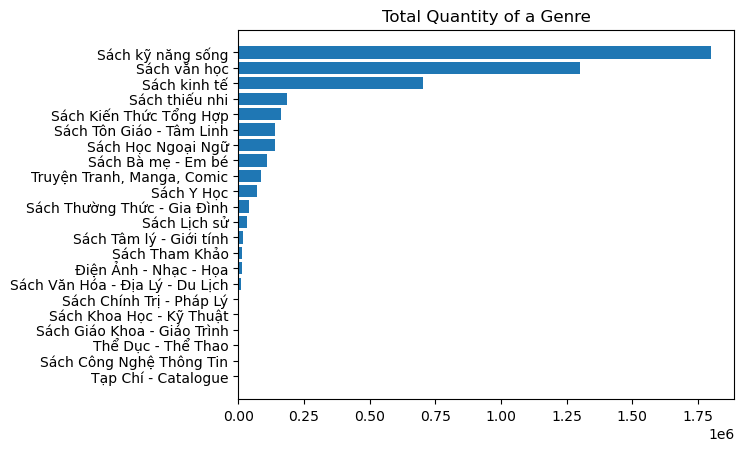

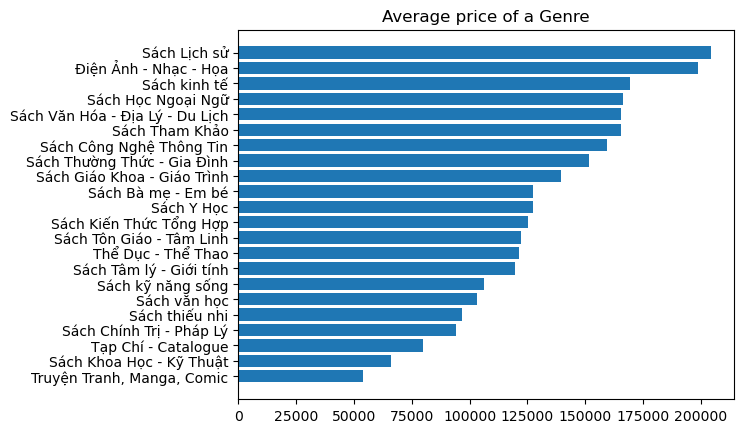

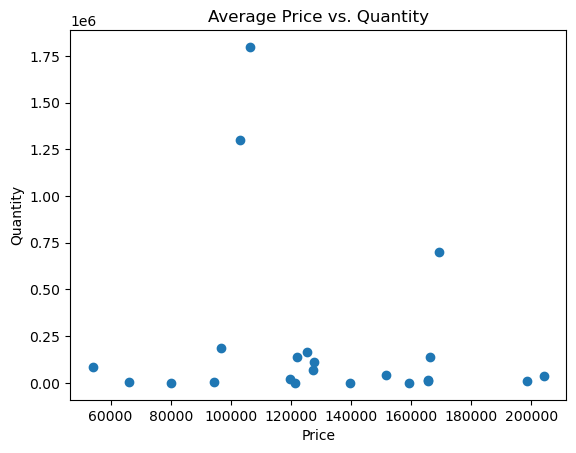

In [34]:
cate_quantity_sum = my_book_df.groupby('bigger_cate')['quantity'].sum().sort_values()
cate_currentprice_mean = my_book_df.groupby('bigger_cate')['current_price'].mean().sort_values()
print(cate_quantity_sum)
plt.barh(cate_quantity_sum.keys(), cate_quantity_sum.values)
plt.title("Total Quantity of a Genre")
plt.show()

plt.barh(cate_currentprice_mean.keys(), cate_currentprice_mean.values)
plt.title("Average price of a Genre")
plt.show()

# scatter plot
# get index from cate_quantity_sum
index_quantity = list(cate_quantity_sum.index)
result_mean_price = list(map(cate_currentprice_mean.get, index_quantity))
plt.scatter(result_mean_price, cate_quantity_sum.values)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Average Price vs. Quantity")
plt.show()

As we see 3 plots above, the most bought categories are: 
+ Sách kỹ năng sống
+ Sách văn học
+ Sách kinh tế

Based on the scatter plot, we will also the price range into 3 groups:
+ Low: price < 120K
+ Medium: 120K <= price < 180K
+ High: price >= 180K

We will have a deep look at how these categories receive a lot of attention.

In [35]:
top_category = ["Sách kỹ năng sống", "Sách văn học", "Sách kinh tế"]
# For rating
ave_rating_cate = my_book_df.groupby('bigger_cate')['avg_rating'].mean()
print(top_category)
rating_top_category = list(map(ave_rating_cate.get, top_category))
print(rating_top_category)
# For percentage after promotion sale
# Create a new column "percentage_sale"
my_book_df['percentage_sale'] = 100 - round((my_book_df['current_price'] / my_book_df['original_price'] * 100), 2)
ave_sale_cate = my_book_df.groupby('bigger_cate')['percentage_sale'].mean()
sale_top_category = list(map(ave_sale_cate.get, top_category))
print(sale_top_category)

['Sách kỹ năng sống', 'Sách văn học', 'Sách kinh tế']
[4.498891966758994, 4.649999999999998, 4.51646090534979]
[28.057174515235456, 32.66434959349591, 25.203909465020573]


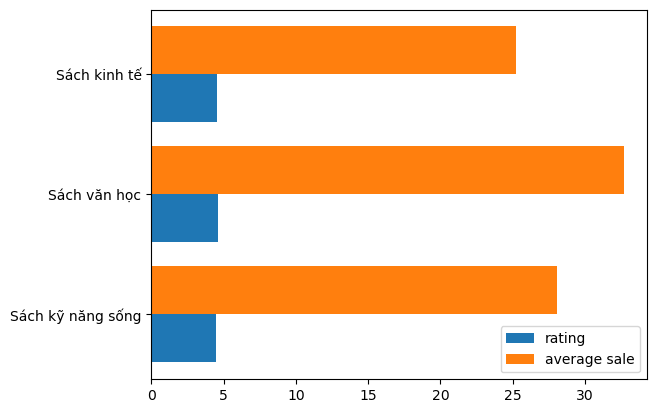

In [36]:
ind = np.arange(3)
plt.barh(ind-0.2, rating_top_category, 0.4, label="rating")
plt.barh(ind+0.2, sale_top_category, 0.4, label="average sale")
plt.yticks(ind, top_category)
plt.legend()
plt.show()

The plot above tells us that the average rating is at around 4.5 and the average sale ranges from 25% to more than just more than 30%. Still, we cannot conclude that this is the factor for their increased amount of quantity in comparison to other groups. We must look for other categories as well.

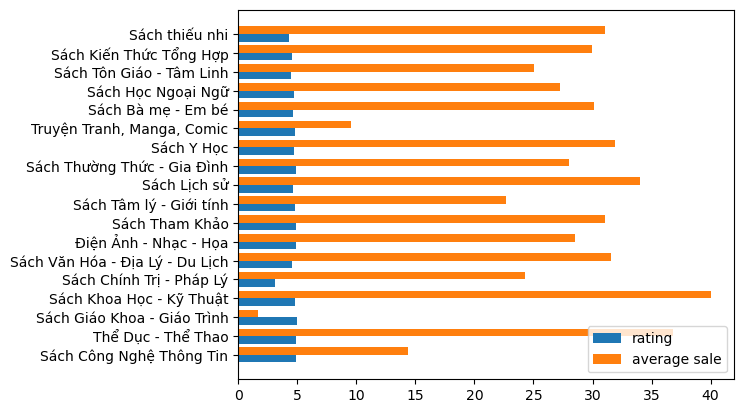

In [37]:
other_category = [x for x in cate_quantity_sum.index if (x not in top_category)]
other_category.remove("Tạp Chí - Catalogue")
# For rating
rating_other_category = list(map(ave_rating_cate.get, other_category))
# For percentage after promotion sale
sale_other_category = list(map(ave_sale_cate.get, other_category))

ind = np.arange(len(other_category))
plt.barh(ind-0.2, rating_other_category, 0.4, label="rating")
plt.barh(ind+0.2, sale_other_category, 0.4, label="average sale")
plt.yticks(ind, other_category)
plt.legend()
plt.show()

**Conclusion for Question 1:**

3 categories in the top surprise me. The fact that there exist two completely price points but still somehow in the top 3 most bought categories. And I think after looking at the graph above, I am able to draw some interesting insights when readers buying books on Tiki:
+ For *Sách văn học* and *Kỹ năng sống*:
    + The sale percentage really hits a lot of readers' mind as they usually sale around 30%
    + Tiki is known for having a lot of promotions for these types of genre
    + Most of the books are quite easy to read for a person who are new to books. Especially with Kỹ năng sống, most of which don't require pre-requisite knowledge.
+ For *Sách kinh tế*:
    + This is an interesting one because even though the average price is in the top high, they still get into the top 3 most-bought books. This might be the topic is quite generic for most people. 
    + Some books can be used as a reference for self-learning
    + A lot of famous economists publish them. Readers follow the authors, buy the books as way to support and learn their point of view in a scenario
    
+ The product includes a bundle/combo of presents and/or books (e.g. Mắt biếc includes a small notebook if you buy since releasing of the movie version)
+ Cheaper than going to an actual bookstore
+ Popularity of a book
+ ...

In my opinion, comic should be the category that enjoys the support from their fan base. But when looking at the plot, it is only in the mid-tier of total sales volume which tradicts my initial guess, which is that the comic category should be at least in the top 5 of most-bought category. I decide to give a careful analysis. I have concluded that:

**Even though the comic category has the quantity among all the middle categories, in reality, most book publishers tend to exclusively release them with a very small amount on online platforms. That is why even though it has the cheapest average price, it also shares a similarity with the quantity. The "camping-to-buy-a-new-release" culture is relatively new in Vietnam but it is slowly appearing in many aspects, including the release of a new phone, new comic from a famous series... We can find them if we follow on the official page on social media about their schedule and releasing date.**

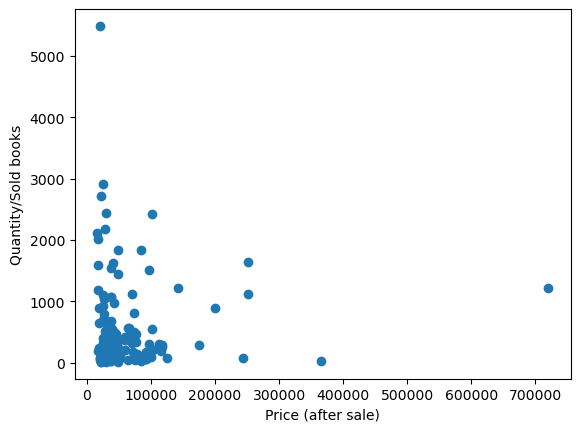

In [38]:
# This is for comic category
comic_df = my_book_df[my_book_df['category']=='Truyện Tranh, Manga, Comic'][['current_price', 'quantity']]
plt.scatter(comic_df.iloc[:, 0].to_numpy(), comic_df.iloc[:, 1].to_numpy())
plt.ylabel("Quantity/Sold books")
plt.xlabel("Price (after sale)")
plt.show()

For the Comic one, I have dedicated a graph to explain why the average price is low but still cannot have a high amount of total sold books. I have come up with a few reasons:
+ Mangas are usually cheap, if we buy them online, we have to pay the shipping fee which could be as high as half the price of a manga, which is not economic at all.
+ They are released exclusively, meaning that some mangas series only release for a certain amount of time or with a limited quantity hence causing them to be low in the total sold books. This is also because buying them in that time is although a bit more expensive but they include bundles, which is the key point for readers to buy, rather than waiting for them to be publicliy release around bookstores but without additional gifts and a reduced price. 
+ After market is also a reason to the low selling rate. Some books when they pass throught the highest "hot" peak (most anticipated time), they can be sold to be as low as half of the original price so buying online is not a very wise option.

## **Question 2:** Do readers prefer foreign over Vietnamese authors? And on which categories do the foreign outnumber in terms of quantity and vice versa?

Authors play an important role in users buying books. Many readers buy books because of the authors. It is indeed that foreign authors are much popular among readers than that of Vietnamese authors. We want to know whether foreign authors attract more readers or Vietnamses authors will attract more based on their popularity.

Here are the steps:
+ Step 1: Classifiy language based on the author's birth country
+ Step 2: Group the language by the total amount and sum of quantity
+ Step 3: Choose the 5 categories with high amount of quantity and compare

In [39]:
!pip install langdetect

In [40]:
from langdetect import detect
author_origin = []
for i in my_book_df.index:
    if (type(my_book_df['authors'][i]) == float or my_book_df['authors'][i] == "." or my_book_df['authors'][i] == ".." or my_book_df['authors'][i] == " "):
        author_origin.append('None')
    elif detect(my_book_df['authors'][i]) == "vi":
        author_origin.append('vi')
    else:
        author_origin.append('other')
my_book_df['author_origin'] = author_origin

Now we group the `author_origin` and `category` and count the amount of books + sum of total books sold of each category 

In [41]:
# lang_df_count = my_book_df.groupby(['author_origin', 'bigger_cate']).count()
lang_df_sum = my_book_df.groupby(['author_origin', 'bigger_cate']).sum()

lang_df = my_book_df.groupby(['author_origin']).count()
lang_df

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,bigger_cate,percentage_sale
author_origin,,,,,,,,,,,,,
None,159,20,159,159,144,159,159,159,97,159,159,159,158
other,1152,1152,1152,1152,1128,1152,1152,1152,1005,1152,1152,1152,1152
vi,464,464,464,464,458,464,464,464,423,464,464,464,464


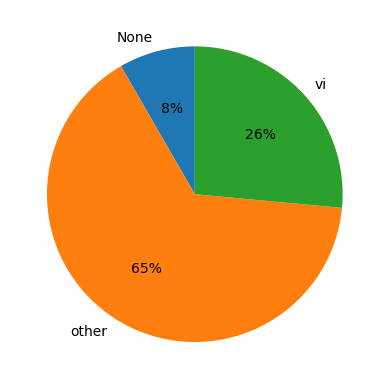

In [42]:
plt.pie(lang_df['quantity'].to_numpy(), labels = ['None', 'other', 'vi'], startangle = 90, autopct='%1.0f%%')
plt.show()

The pie chart shows that the "other" category occupies the most space. We will take "other" as the standard to take out the 5 most-bought books and use those categories to extract the quantity for the "other" and "vi". Also, we will eliminate books that is in the "None" category for ease of analysis

In [43]:
# get the top 5 categories from other
category = my_book_df[my_book_df['author_origin'] == 'other'].bigger_cate.value_counts()[:5].index.to_list()
category_other_quantity = my_book_df[my_book_df['author_origin'] == 'other'].bigger_cate.value_counts()[:5].values

print(category)
print(category_other_quantity)


['Sách văn học', 'Sách kỹ năng sống', 'Sách kinh tế', 'Truyện Tranh, Manga, Comic', 'Sách thiếu nhi']
[303 231 178 175  74]


In [44]:
category_vi_quantity = []
for i in category: # count vietnamese book
    temp = len(my_book_df[(my_book_df.bigger_cate == i) & (my_book_df.author_origin == 'vi')]['quantity'] )
    category_vi_quantity.append(temp)
print(category_vi_quantity)

[171, 101, 30, 1, 27]


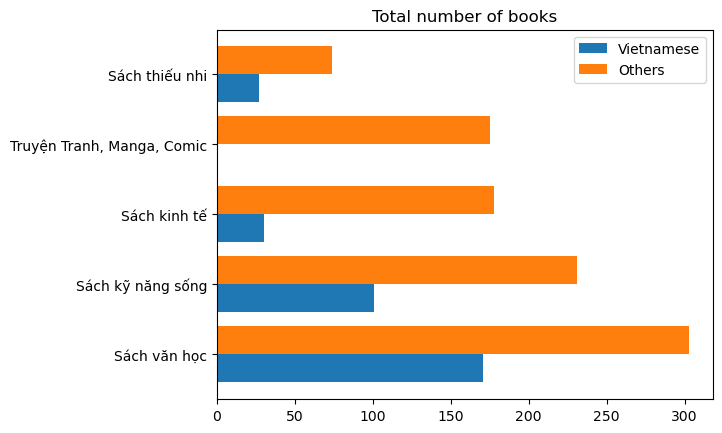

In [45]:
ind = np.arange(5)
plt.barh(ind-0.2, category_vi_quantity, 0.4, label="Vietnamese")
plt.barh(ind+0.2, category_other_quantity, 0.4, label="Others")
plt.title("Total number of books")
plt.yticks(ind, category)
plt.legend()
plt.show()

In [46]:
total_sum_quantity = []
for i in ["other", "vi"]:
    for j in category:
        total_sum_quantity.append(lang_df_sum.loc[(i, j), 'quantity'])
other = total_sum_quantity[0:5]
vi = total_sum_quantity[5:10]
# lang_df_sum.loc[("other", "Sách kinh tế")]

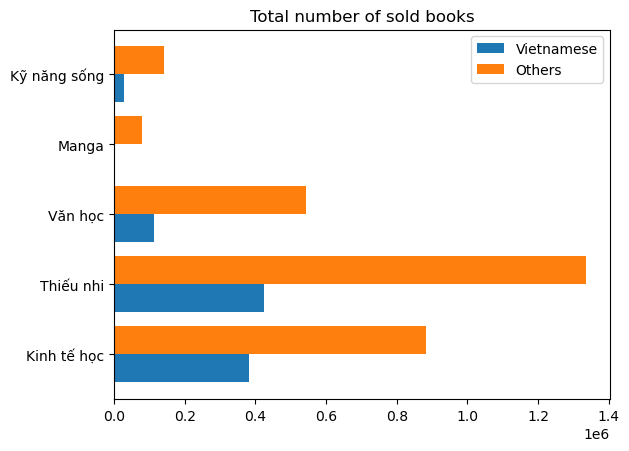

In [47]:
plt.barh(ind-0.2, vi, 0.4, label="Vietnamese")
plt.barh(ind+0.2, other, 0.4, label="Others")
plt.title("Total number of sold books")
plt.yticks(ind, ["Kinh tế học", "Thiếu nhi", "Văn học", "Manga", "Kỹ năng sống"])
plt.legend()
plt.show()

**Conclusion for question 2**

As shown in the plots above, the "Others" category accounts for 65% of all books in the Tiki platform.
The "Others" section has more books than the "Vietnamese" section.
Finally, based on the overall number of books sold, it is apparent that they outperform anything from "Vietnamese."
But why would the "Vietnamse" can't catch up with the "Others"? There are some reasons we deduct based on the data:
+ The content from "Other" authors is more intriguing than the majority of Vietnamese authors. 
+ Foreign content is valued by online platforms, which raises the price. This devalues the Vietnamese one. 
+ Foreign book references are far more useful than Vietnamese book references. Some Vietnamese books cite international books as well.
+ A lot of famous authors has a strong reputation for a very long time. In Văn học, a lot of authors can be listed like: J.K.Rowling, Marc Levy... They have a big fan base in Vietnam and will support the authors as much as they can.

Overall, we can conclude that: based on the data, the majority of top books from other countries attract more Vietnamese readers whereas, very few Vietnamese authors can make into the top list or the best-selling list. Despite the fact that many Vietnamese authors are talented and creative, they are still struggling to find a way to make their works interesting and attract more readers in order to raise the selling rate.

## **Question 3:** Build a Recommender System to suggest new books for readers

The Recommender System is one of the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user will give an item.

Answer this question can help to assist users in finding the right information, predicting preferences based on book that  customer buy in the past and information of  other customers related that have the same hoppy of reading books . From there, suggest users related books that users may buy it.

* Users should be able to easily identify and purchase the books they are interested in
* Vendors and e-commerce websites could improve user experience and usability to encourage more book purchases and boost revenue.

To answer this question, we will follow these steps:
>    **Step 1:** find all comment that has rating greater or equal 3 because rating is in range 0 to 5. We just want to recommend the book that good enough base on the comment satisfy about book. <br>
> **Step 2:** create pivot table with row is the title of the book and the column is the customer_id <br>
> **Step 3:** build KNN model to fit pivot table <br>
> **Step 4:** create a "bag of words" for all rows.<br>
    > **Step 5:** transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text and calculate similarity between these vector and save it to a matrix<br>
> **Step 6:** recommend book base on the cosine similarity.<br>
> **Step 7:** visualize the book using `cover_link` in `book_df`


***Step 1***: *find all comment that has rating greater or equal 3 because rating is in range 0 to 5. We just want to recommend the book that good enough base on the comment satisfy about book.*

In [48]:
well_ratings = comment_df[comment_df.rating>=3]

***Step 2***: *create pivot table with row is the title of the book and the column is the customer_id*

We will merge 2 table `book_df` and `commend_df` and create pivot table with row is the title of the book and the column is the customer_id. Then we will fill nan value will 0.

In [49]:
data = well_ratings.merge(book_df,left_on='product_id',right_on='product_id',how='right')
pivot_table = data.pivot_table(index = ["title_y"],columns = ["customer_id"],values = "rating").fillna(0)
pivot_table.head(3)

customer_id,27.0,120.0,247.0,285.0,393.0,406.0,479.0,544.0,622.0,661.0,...,28558690.0,28559132.0,28562264.0,28562962.0,28563570.0,28568580.0,28568744.0,28575382.0,28576664.0,28578516.0
title_y,,,,,,,,,,,,,,,,,,,,,
Cứ Làm Đi!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Để Trở Thành Người Bán Hàng Giỏi Nhất Thế Giới,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""999 Lá Thư Gửi Cho Chính Mình” - Phiên Bản Mini",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Step 3:*** *build KNN model to fit pivot table*  <br>


We will build Nearest Neighbors model using brute-force search and use cosine for distance computation

In [50]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction
pivot_matrix = csr_matrix(pivot_table)
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(pivot_matrix)

***Step 4:*** *create a "bag of words" for all rows.*

We will using column `title`, `author`,`category`, `avg_rating` to create "bag of words".

In [51]:
fillnabooks= book_df.fillna('')[book_df.title.isin(pivot_table.index) ]
def create_soup(x):
    return x['title'].lower()+ ' ' + x['authors'].lower().replace(' ','') + ' ' + x['category'] + str(x['avg_rating']) 
fillnabooks['soup'] = fillnabooks.apply(create_soup, axis=1)

***Step 5:*** *transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text and calculate similarity between these vector and save it to a matrix.*

We will transform the "bag of words" into vector and calculate cosine similarity between them. Because the matrix so we will save the matrix of the origin dataframe for easy access.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillnabooks['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)


In [53]:
fillnabooks=fillnabooks.reset_index()
indices = pd.Series(fillnabooks.index, index=fillnabooks['title'])

***Step 6:*** *recommend book base on the cosine similarity.*

In this step, we will combine 2 method Content-based Filtering và Collabrative Filtering. Score of a book will be calculate by 0.2 * score using Content-based Filtering and 0.8 * score using Collabrative Filtering. Because we want to recommend the books that user might like on the basis of reactions by similar users.

In [54]:
def recommend_book(title):
    distance, indice = model_knn.kneighbors(pivot_table.loc[title,:].values.reshape(1,-1), n_neighbors=len(pivot_table))
    colla = pd.Series(distance.flatten(),index = pivot_table.index[indice.flatten()])
    
    idx = indices[title]
    books = ((1-pd.Series(cosine_sim[idx],index = fillnabooks.title).sort_values(ascending=False)[colla.index])*0.2+colla*0.8).sort_values()[:6]
    books_recommend = book_df[book_df.title.isin(books.index)][['title','cover_link','current_price']]
    return books_recommend.set_index('title').loc[books.index]
books = recommend_book('Perfect Ielts Vocabulary (Tái Bản)')
books

,cover_link,current_price
Perfect Ielts Vocabulary (Tái Bản),https://salt.tikicdn.com/ts/product/03/77/ff/6...,165000
Hackers Toeic Vocabulary (Tái Bản),https://salt.tikicdn.com/ts/product/e0/22/b4/3...,179000
How To Crack The Ielts Writing Test - Vol. 1 (Tái Bản),https://salt.tikicdn.com/ts/product/6e/c3/ab/6...,200970
Ngữ Pháp Tiếng Anh (Tái Bản),https://salt.tikicdn.com/ts/product/1c/d0/6d/2...,61400
Barron's Essential Words For The Ielts (Tái Bản),https://salt.tikicdn.com/media/catalog/product...,137200
Combo Sách Học Tiếng Anh Little Stories 1 (5 Cuốn),https://salt.tikicdn.com/ts/product/6d/fc/d6/e...,217700


***Step 7:*** *visualize the book using cover_link in book_df*

We will visualize the book that is recommended with name and price using other information from the `book df`.

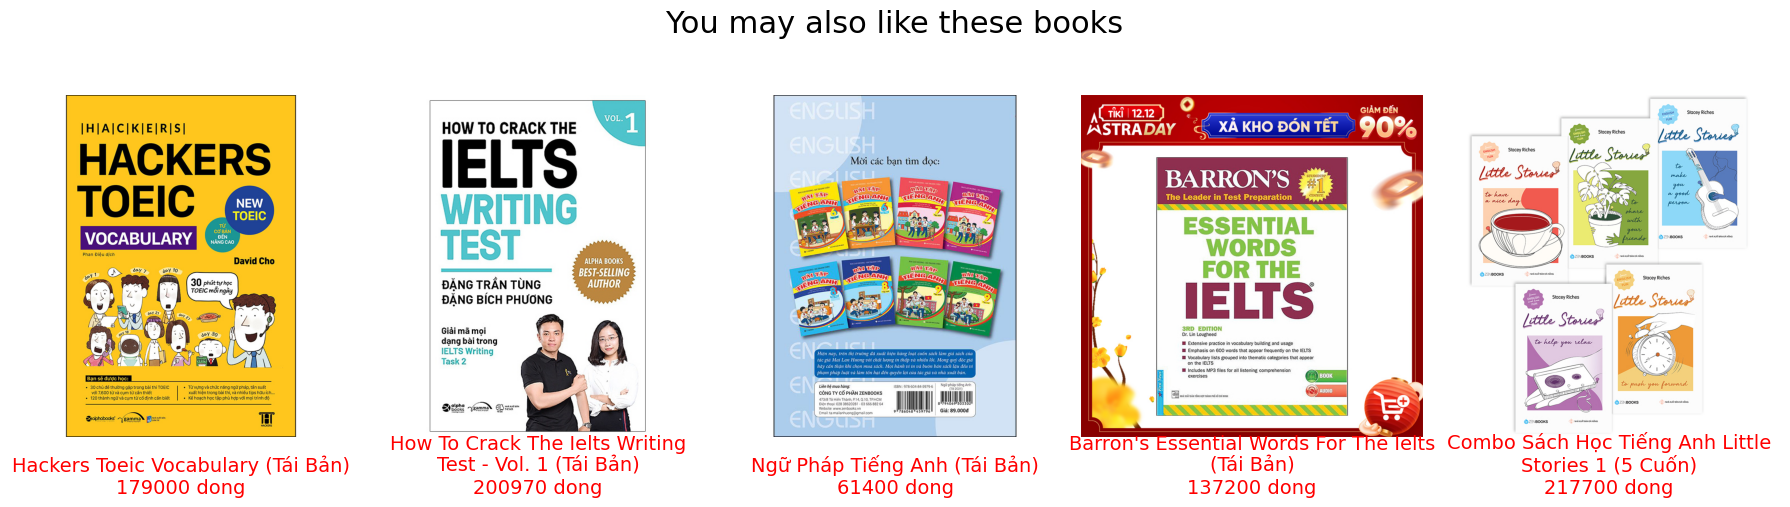

In [56]:
from PIL import Image
import requests
def visualize_books(books):
    fig, axs = plt.subplots(1, 5,figsize=(18,5))
    fig.suptitle('You may also like these books', size = 22)
    poster = books.cover_link.to_list()[1:]
    title = []
    for line in books.index.values[1:]:
        words = line.split(' ')
        st = ''
        for i in range(0,len(words),6):
            end = i + 6
            if len(words) < end:
                end = len(words)
            temp = ' '.join(words[i:end])
            st = st+temp+'\n'
        title.append(st[:-1])
    price = books.current_price[1:]

    for i in range(len(poster)):

                    url = poster[i]
                    row = 0 #if i>=5 else 0
                    im = Image.open(requests.get(url, stream=True).raw)
                    axs[i%5].imshow(im)
                    axs[i%5].axis("off")
                    axs[i%5].set_title(title[i]+'\n'+str(price[i])+' dong',
                                 y=-0.18,
                                     color="red",
                                     fontsize=14, loc='center', wrap=True)
                    fig.tight_layout()
    fig.show()
visualize_books(books)

Finally we will recommend a random book in our dataset

Sức Mạnh Tiềm Thức (Tái Bản)


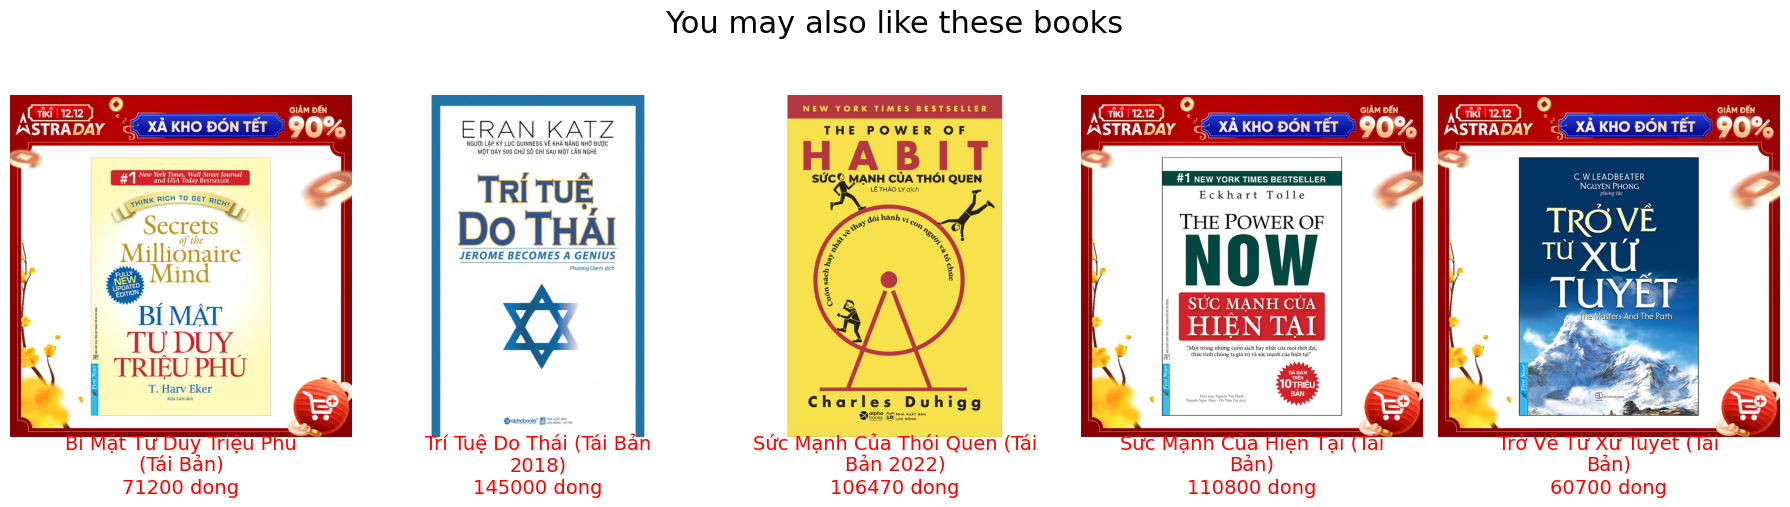

In [57]:
import random 
random_book = random.choice(book_df.title.to_list())
print(random_book)
books = recommend_book(random_book)
visualize_books(books)

## **Question 4:** Analyze customer reviews

Collecting customer feedback is a great way for businesses to understand the strengths and weaknesses of their products and services; meanwhile, using this information to quickly improve product offerings. This can be done effectively by taking advantage of data that users voluntarily share online such as comments, reviews, shares etc. By doing so you will have access to valuable insights into your customers' thoughts and needs which can lead you directly to providing them with the best possible service. In addition, collecting feedback from customers allows businesses to swiftly adapt their strategies in order not lose market share or slow down growth rates

Answer this question can be helpful for vendors and e-commerce websites, as it allows them to evaluate their products more effectively. This is especially important when a business has a new book to market; getting user feedback is necessary in order to make the best improvements possible.

To answer this question, we will follow these steps:
> **Step 1:** preproccessing the reviews of the user. <br>
> **Step 2:** calculate the frequently occuring words in the data in both negative and positive reviews. <br>
> **Step 3:** vectorization and Topic Modelling to extract feature from the text. <br>

***Step 1:*** *preproccessing the reviews of the user.*

In order to improve the quality of reviews, we will preprocess them first which includes:
* Convert the text into lowercase
* Clean string without punctuations
* Remove stopwords
* Remove other keywords

In [58]:
comment_df = comment_df.fillna('')

In [59]:
import re
import string
keywords = ['sách','cuốn','quyển','nan']
stopword = ['nhưng','tiki','rất','sẽ','bị','nên','thì','mình','cho', 'chú thích', 'các', 'còn', 'có', 'cũng', 'của',  'hai', 'hoa', 'họ', 'khi', 'khoa học', 'không', 'liên kết', 'loài', 'là', 'làm', 'miêu tả', 'mô tả', 'một', 'ngoài', 'ngày', 'người', 'nhiều', 'như', 'nhất', 'những', 'này', 'nó', 'năm', 'ra', 'sau', 'tham khảo', 'theo', 'thuộc', 'tháng', 'thêm', 'thể loại', 'thực vật', 'trong', 'trên', 'tên', 'tại', 'tỉnh', 'từ', 'và', 'vào', 'về', 'với', 'xem', 'đã', 'đó', 'được', 'đầu tiên', 'đến', 'để']
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Clean string without punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into list
    wordList = text.split()
    # Remove stopwords
    wordList = [word for word in wordList if word not in stopword]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    return " ".join(wordList)
comment_df["clean_text"] = comment_df["content"].apply(clean_text)

***Step 2:*** *calculate the frequently occuring words in the data.*


In the dataset:

* 0<= rating < 3: Negative reviews

* rating = 3: Neutral reviews

* 3 < rating <= 5: Positive reviews

First, we will look at the unigram

In [60]:
from collections import defaultdict
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" ]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def ngrams(df,n):
    freq_dict = defaultdict(int)
    for sent in df:
        for word in generate_ngrams(sent,n):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1],columns=['words','freq'])
    return fd_sorted

fd_sorted_pos = ngrams(comment_df[comment_df.rating>=3]["clean_text"],1)
fd_sorted_neg = ngrams(comment_df[comment_df.rating<3]["clean_text"],1)


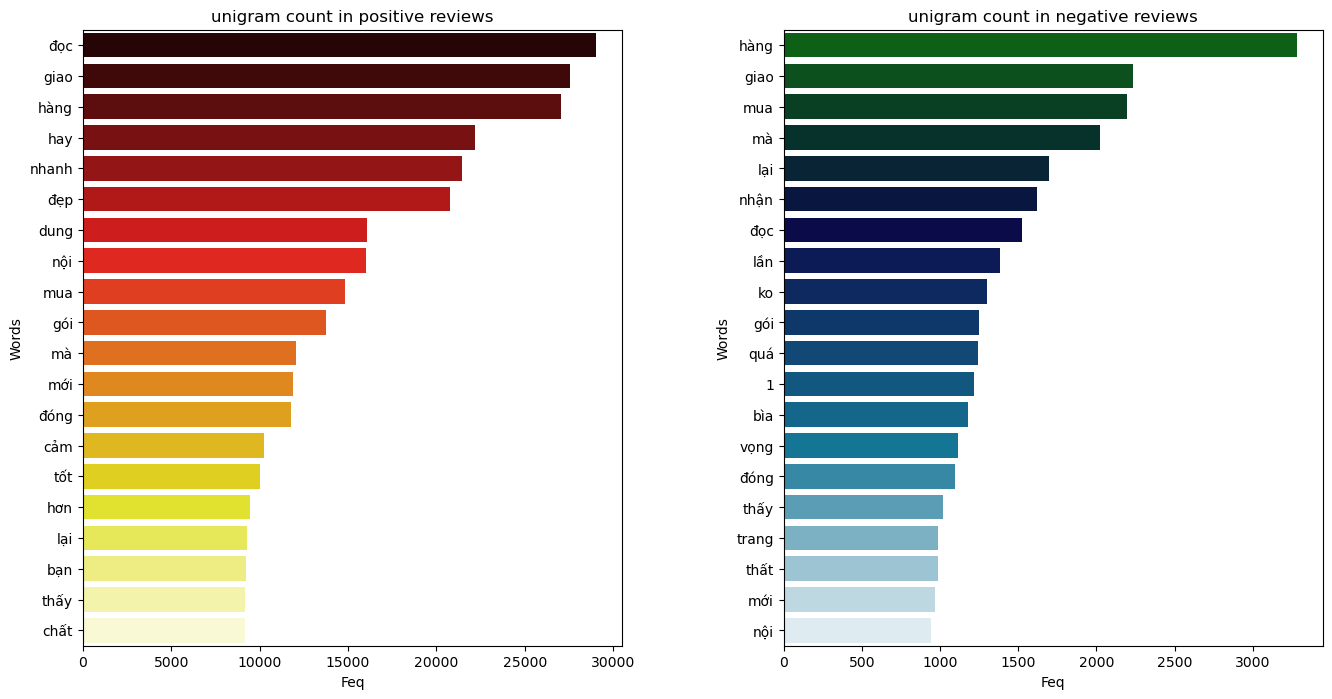

In [61]:
import seaborn as sns
def visualize_words(fd_sorted_pos,title_pos,fd_sorted_neg,title_neg,style_pos = 'hot',style_neg = 'ocean'):
    fig,ax = plt.subplots(1,2,figsize=(16,8))
    ax1,ax2 = ax.flatten()

    sns.barplot(x = fd_sorted_pos['freq'][:20], y = fd_sorted_pos.words[:20], palette= style_pos,ax=ax1)
    ax1.set_title(title_pos)
    ax1.set_ylabel('Words')
    ax1.set_xlabel('Feq')

    sns.barplot(x = fd_sorted_neg['freq'][:20], y = fd_sorted_neg.words[:20], palette = style_neg,ax=ax2)
    ax2.set_title(title_neg)
    ax2.set_ylabel('Words')
    ax2.set_xlabel('Feq')
    plt.subplots_adjust(wspace=0.3);
visualize_words(fd_sorted_pos,'unigram count in positive reviews',fd_sorted_neg,'unigram count in negative reviews')

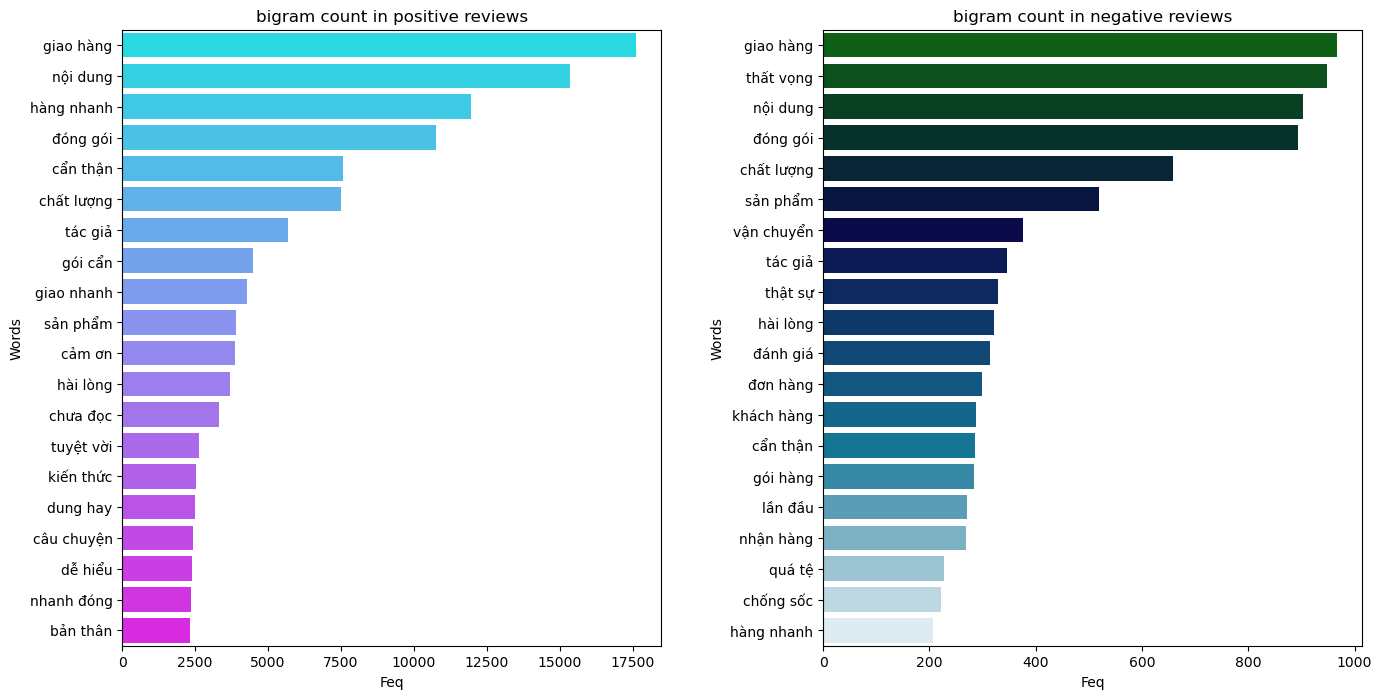

In [62]:
fd_sorted_pos = ngrams(comment_df[comment_df.rating>=3]["clean_text"],2)
fd_sorted_neg = ngrams(comment_df[comment_df.rating<3]["clean_text"],2)
visualize_words(fd_sorted_pos,'bigram count in positive reviews',fd_sorted_neg,'bigram count in negative reviews','cool')

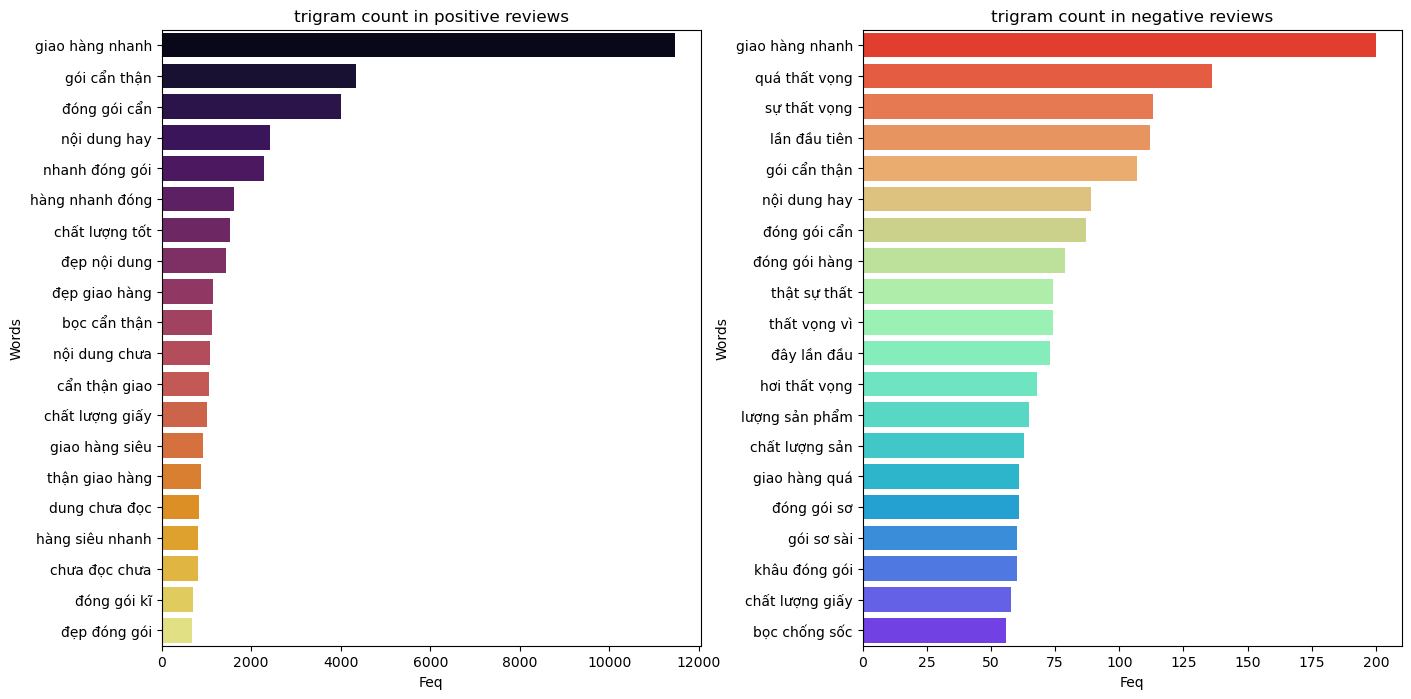

In [63]:
fd_sorted_pos = ngrams(comment_df[comment_df.rating>=3]["clean_text"],3)
fd_sorted_neg = ngrams(comment_df[comment_df.rating<3]["clean_text"],3)
visualize_words(fd_sorted_pos,'trigram count in positive reviews',fd_sorted_neg,'trigram count in negative reviews','inferno','rainbow_r')

Observations:
* There are a few reasons customers may leave positive reviews for a bookseller. Some of the common reasons are the shipping is fast, the content of the book is good, paper quality is good, the book is beautiful, and the book is packed carefully. Another common reason is that the quality of the book is good.<br> <br>
* There are a few reasons customers may leave negative reviews for a bookseller. Some of the common reasons are they disappointed about shipping, the book is not packed carefully, a lot of them disappointed in the first time buy the book on tiki. Another common reason is that they feel that the quality of the book is not good. <br> <br>
* All customers are generally pleased with the promptness of the shipping.

Most of the complaints in the reviews are about the quality of the books when they are shipped, rather than the content of the books. This is because it is easy to evaluate the book based on its appearance when you first receive it, but it may take some time to understand the book. <br> <br>
A lot of positive reviews say that the books give them a lot of knowledge, and they focus more on the content of the book than the negative reviews.

View some title of the reviews can also give some information

In [64]:
comment_df[comment_df.rating>=3].title.value_counts()[:20]

Cực kì hài lòng     95598
Hài lòng            11562
Bình thường          3705
Sách hay              112
Rất hài lòng           97
Tuyệt vời              78
Tốt                    51
Hay                    50
hài lòng               28
sách hay               28
Sách đẹp               24
Sách rất hay           23
Good                   23
Rất hay                21
Cực kỳ hài lòng        20
Đáng đọc               18
tốt                    17
Hài Lòng               17
Sách hay nên đọc       16
Rất tốt                16
Name: title, dtype: int64

In [65]:
comment_df[comment_df.rating<3].title.value_counts()[:20]

Rất không hài lòng      3050
Không hài lòng          1793
Cực kì hài lòng           59
Hài lòng                  29
Thất vọng                 11
Sách cũ                    8
không hài lòng             8
ĐÓNG GÓI HÀNG ẨU TẢ!       7
thất vọng                  5
Quá tệ                     4
Khá thất vọng              4
Sách bị rách               4
Sách bị lỗi                4
Bình thường                4
Sách lỗi                   3
Sách dơ                    3
Rất thất vọng              3
Chưa hài lòng              3
Sách thiếu trang           3
Chất lượng sách tệ         3
Name: title, dtype: int64

In our dataset on Tiki, we can see that the number of people given from 3 to 5 star is significantly higher than those who left negative reviews.

Now, we will look at the length of the reviews

In [66]:
valid_comment = comment_df[(comment_df.rating>=3) & (comment_df.rating != 'nan')]
sum(valid_comment.content.str.len())/len(valid_comment)

96.52669875644892

In [67]:
valid_comment = comment_df[(comment_df.rating<3) & (comment_df.rating != 'nan')]
sum(valid_comment.content.str.len())/len(valid_comment)

187.65503875968992

We can see that the average length of positive reviews is 97 characters and in negative reviews is 187 characters. People tend to write complaints about books, about how bad the service is and the process that makes them unsatisfied more than they feel good about the service.

We will use TF-IDF and LDA to discovering  and understand more about the meaning of the reviews. Each document is made up of various words, and each topic also has various words belonging to it. The aim of LDA is to find topics a document belongs to, based on the words in it.

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text.

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

In [69]:
# 3.2 Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=7
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [70]:
tfidf = tfidf_vectorizer.fit_transform(comment_df[comment_df.rating<=3]["clean_text"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=50, n_components=7, random_state=0)

In [71]:
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()
print("Below is the output from LDA model with {} topics for negative reviews.".format(n_topics))
print_topn_words(lda, tfidf_feature_names, 7)

Below is the output from LDA model with 7 topics for negative reviews.
Topic #0: lần mua hàng mà nhận tôi đơn
Topic #1: gói đóng cẩn thận hàng chuyển vận
Topic #2: giao hàng ko bọc nhanh giá nhận
Topic #3: chất lượng trang lỗi giấy lòng hài
Topic #4: dung nội đọc hay chưa lắm khó
Topic #5: bìa cũ bẩn hơi rách góc vọng
Topic #6: đọc dịch giả bản tác bạn lại



Now, we will look at some negative reviews that have words `dịch giả` or `lỗi` to have more information

In [72]:
comment_df[(comment_df.rating<=3) &(comment_df.content.str.contains('dịch giả'))].content.values[:3]

array(['Sách nhiều lỗi sai chính tả, cách hành văn của dịch giả không tốt. Rất giống như mô tả về những cuốn sách giả, in lậu. Đọc sách gây cảm giác khó chịu!',
       'Nội dung do tác giả Camus viết hay. Nhưng bản dịch của dịch giả từ năm 1971, đáng lẽ nhà xuất bản phải chỉnh sửa để phù hợp với cách sử dụng ngôn ngữ ngày nay. Ngoài ra, có nhiều lỗi chính tả, thể hiện nhà xuất bản coi trọng lợi nhuận hơn chất lượng sách.',
       'Bản dịch được tài trợ bởi Google dịch?. Đây là cuốn sách nước ngoài được dịch bởi người VN nhưng khi đọc bản dịch tôi nghĩ có lẽ dịch giả sử dụng Gg để hoàn thành KPI thay vì sử dụng kỹ năng dịch thuật để dịch cuốn sách này. Đọc bản dịch rất chán, không thể hiểu điều mà tác giả muốn trình bày. \r\nHighly Rcm mn không mua của dịch giả này'],
      dtype=object)

In [73]:
comment_df[(comment_df.rating<=3) &(comment_df.content.str.contains('lỗi'))].content.values[:3]

array(['Tiki lần này làm việc rất tắc trách. Mình đặt sách từ tháng 8 mà mãi đến tháng 11 mới giao, rất nhiều lần mình nhắn bên hỗ trợ khách hàng để hỏi về tình hình sản phẩm, song chỉ nhận được mail xin lỗi và hướng dẫn hủy đơn hàng. Nhưng đơn hàng đang trong tình trạng: đang vận chuyển thì làm sao mà hủy đơn được ? Vì vậy mình mới phải đợi đơn hàng giao đến rồi mình mới có thể hoàn trả. Nhưng Tiki lại một lần nữa bắt khách hàng đợi tầm 1 tuần cho các thủ tục lấy hàng, đợi hàng về kho, kiểm tra chất lượng sản phẩm... Mình đặt sách, mình trả tiền đàng hoàng, bỏ thời gian ra đợi để phục vụ cho công việc riêng của mình...mà Tiki làm như thế này là không được, mình chấp nhận mất 3 Bookcare để trả lại sách (vì mình đã phải lên mạng tìm ebook để tải) vậy mà khi nhắn với bên hỗ trợ khách hàng, mình chỉ nhận lại được lời: rất tiếc vì mình gặp hoàn cảnh này, mong anh/chị thông cảm. Vậy cho mình hỏi, ai sẽ thông cảm cho trường hợp của mình ? Lần đầu mình có trải nghiệm tệ như vậy với Tiki!',
  

* It's interesting to see that not all the negative reviews are complaints about the books. In fact, some reviewers actually point out some good aspects of the books. This shows that even if there are some negative aspects to a book, there can still be some good things about it.
* Many of the books that are translated from other languages can be difficult to understand. The content often leaves readers confused and unable to fully comprehend it. This can be especially true for literature or other texts that are dense with meaning. A good translation can make all the difference in whether or not a reader is able to engage with a text.
* The book is old and dirty, the cover is slightly damaged during shipping, and the corner of the spine is dented.
* It's frustrating when you order something online and it arrives looking nothing like the photo. Or maybe it's not the right size, or it's damaged. Whatever the case may be, it's always a disappointment to receive something that isn't up to par.

* When it comes to paper products, poor quality paper and careless packaging can really ruin the experience. If the paper is flimsy or the packaging is too loose, the product can arrive damaged or wrinkled. This is especially frustrating if you've paid a premium for the item.

* It's important that customers can always return an item if it's not up to their standards. To avoid these issues, it is important to use high quality paper and to take care when packaging items for shipment.


There a lot of positive reviews but to save time, we just choose a sample of 5000 reviews to find the topic

In [74]:
tfidf = tfidf_vectorizer.fit_transform(comment_df[(comment_df.rating>=3) & (comment_df.content!='nan') ].sample(9000)["clean_text"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=50, n_components=7, random_state=0)

In [75]:
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()
print("Below is the output from LDA model with {} topics for positive review.".format(n_topics))
print_topn_words(lda, tfidf_feature_names, 7)

Below is the output from LDA model with 7 topics for positive review.
Topic #0: hay đọc đáng tác mua bạn giả
Topic #1: dung nội đẹp dễ bìa hay khá
Topic #2: hơi ko bọc sao gì vẫn giao
Topic #3: tốt chất lượng phẩm hàng giao lòng
Topic #4: giao nhanh gói hàng đóng cẩn thận
Topic #5: mua luôn lắm mới nhận giao hàng
Topic #6: đọc bản thể bạn sự thấy cách



* It's interesting to see that many books not read the books yet but they also give the positive reviews because how beautiful the books is, the shipping, the quality of the paper, the shape of the package and shape of the book, about how new the book is. All of these factors play into how people view the book and whether or not they would recommend it to others.
* There are many people who love to read books that have content that can help us learn gratitude and understand ourselves better. The content in these books is usually easy to understand, which makes them even more enjoyable to read.Learning to be grateful for what we have, and understanding ourselves better can lead to a much happier and more fulfilling life. These books can help us get on the right track to achieving this.

# 5. Reflection

## 5.1 Member: Phan Xuan Nam

**Difficulties**
+ I struggle to find a good question that is capable of gathering useful insights of a dataset. Even though coding is not a very hard part, I still struggle when using Pandas's indexing system.
+ Looking for an interesting dataset is not an easy task. A lot of works need to be done in order to choose a good one. We don't want our dataset to feel "boring" when working with, since a lot of group will choose the popular ones.
+ Looking at each other's code and understand thoroughly is a challenge for me. Since this is my first time working with him, I am not used to his style of coding and it takes me quite a bit of time to be aware of the functionality of each cell.
+ I am still working on my Git skills. I thought I had a good knowledge of Git but when moving to Jupyter Notebook, I had to learn how the terminal in Git operates and make some changes to my system. After all, it is a good opportunity for me to work on different platforms.
+ Our choice of dataset exists a problem: there is no column indicating the time. This is very a useful piece of information since it allows us to learn the trend of the data, give solutions to improve the selling rate and so on. 

**What have I learned?**
+ Working with Git to make each member more independent with their jobs
+ Communicating with my member and conveying my ideas about the structure of the project
+ A consult with friends who major or have experience with data analysis help me improve on judging the quality of a question based on the quality and attributes of a dataset.

**What would our group do if we had more time?**
+ Choose a similar dataset but with a time attribute.
+ Use a ML model to give a better insight, not just about predicting the trend of the dataset.
+ Conduct a research on the topic we choose. Since we are trying to give meaningful questions, we should spend some time understanding the basic of the topic and slowly moving towards different concepts of it. 

## 5.2 Member: Pham Tran Trung Luong

**Difficulties**
1. It can be difficult to find a topic that is not too difficult but also has a lot of things to explore, and a topic that we are really interested in but also closer to our life.
2. When it comes to research questions, it can be tough to come up with something that is both unique and answerable. Ultimately, it is important to find a balance between these different factors when choosing a research topic.

**What have I learned?**
1. How to find a dataset and extract information from kaggle.
2. About recommend system, different methods to create recommender system and how to preprocess text, algorithms to analyze text.
3. How to read data and perform simple analysis on the book information, drawing conclusions from the data.

**What to do next**
1. Have a deeper analysis of the reviews of users and improve recommender system.
2. Ask more questions to gain more insights about the data.

# 6.References

1. Documents of the subject [Programing For Data Science](https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq)
2. Pandas Documentation  [User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
3. Matplotlib 3.5.3 documentation  [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
4. Tiki Books Dataset [Data Books of Tiki E-commerce in Vietnam](https://www.kaggle.com/datasets/biminhc/tiki-books-dataset)
5. Scikit-learn Documentation  [scikit-learn Machine Learning in Python](https://www.kaggle.com/datasets/biminhc/tiki-books-dataset)
6. Latent Dirichlet allocation [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
7. K-nearest neighbors algorithm [K-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)